In [1]:
import pandas as pd

In [2]:
facts  = ""
with open("recipe_model_tapp23_parallel_violation.pl","r") as file:
    for l in file:
        #if l.strip().startswith("%"):
        #    continue
        
        facts += l.strip() + "\n"

In [3]:
#!clingo recipe_model_tapp23_parallel_violation.pl

In [4]:
from clingo.symbol import Number
from clingo.control import Control

ctl = Control()
ctl.add("base", [], facts)

In [5]:
ctl.ground([("base", [])])
solver = ctl.solve(yield_=True)

recipe_model_tapp23_analysis.pl:119:14-16: info: global variable in tuple of aggregate element:
  S1

recipe_model_tapp23_analysis.pl:125:14-17: info: global variable in tuple of aggregate element:
  Sid



In [6]:
output = []
for x in solver:
    output.append(x)

In [7]:
df_output = {}
df_output_str = {}
for s in x.context.symbolic_atoms.signatures:
    #print(s)
    df_output[(s[0],s[1])] = []
    df_output_str[(s[0],s[1])] = []
    for y in x.context.symbolic_atoms.by_signature(s[0],s[1]):
        temp_tuple = [y.symbol.name]
        temp_tuple = temp_tuple + [str(z) for z in y.symbol.arguments]
        df_output[(s[0],s[1])].append(y.symbol)
        df_output_str[(s[0],s[1])].append(temp_tuple)

In [8]:
# visualize using graphviz yw layout

nodes_def = """
digraph "[stackcollapse]" {
node [style=filled fillcolor="#f8f8f8"]
"""

edge_def = ""

# workflow template gv format

header = """
/* Start of top-level graph */
digraph Workflow {
rankdir=LR

/* Start of double cluster for drawing box around nodes in workflow */
subgraph cluster_workflow_box_outer { label=""; penwidth=0
subgraph cluster_workflow_box_inner { label=""; penwidth=0
"""

single_process = """
/* Style for nodes representing atomic programs in workflow */
node[shape=box style=filled fillcolor="#CCFFCC" peripheries=1 fontname=Helvetica]

/* Nodes representing atomic programs in workflow */
"""
#state_4 [shape=record rankdir=LR label="{<f0> step 4 (to_date) | grel\:value.replace(/\\/i,'') | 16492 cells changed}"];


side_b_process = """
node[shape=box style=filled fillcolor="#CCCCFF" peripheries=1 fontname=Helvetica]
"""
#state_5 [shape=record rankdir=LR label="{<f0> state_5 |<f1> core/mass-edit\nclustering\ngroup clustering 4 processes}"];

side_b_data = """
node[shape=box style="rounded,filled" fillcolor="#FFDDDD" peripheries=1 fontname=Helvetica]
"""

side_a_data = """
node[shape=box style="rounded,filled" fillcolor="#CCFFFF" peripheries=1 fontname=Helvetica]
"""


freq_pattern_nodes = """
node[shape=box style=filled fillcolor="#CCFFFF" peripheries=1 fontname=Helvetica]
"""
#state_5 [shape=record rankdir=LR label="{<f0> state_5 |<f1> core/mass-edit\nclustering\ngroup clustering 4 processes}"];

column_nodes = """
/* Style for nodes representing non-parameter data channels in workflow */
node[shape=box style="rounded,filled" fillcolor="#FFFFCC" peripheries=1 fontname=Helvetica]

/* Nodes for non-parameter data channels in workflow */
"""
#"col12_0-date" [shape=record rankdir=LR label="{<f0> date_0 }"]

parameters_nodes = """
/* Style for nodes representing parameter channels in workflow */
node[shape=box style="rounded,filled" fillcolor="#FCFCFC" peripheries=1 fontname=Helvetica]

/* Nodes representing parameter channels in workflow */
"""

edges = """
/* Edges representing connections between programs and channels */
"""
#"col12_0-date" -> state_4


footer = """
/* End of double cluster for drawing box around nodes in workflow */
}}

/* End of top-level graph */
}
"""

# process nodes
for p in df_output_str[("process",2)]:
    single_process+='''
    "{pid}" [shape=record rankdir=LR label="{{<f0> {pid} ({process_name}) }}"];
    '''.format(pid=p[1],process_name=p[2])

# schema nodes
for cs in df_output_str[("column_schema",3)]:    
    column_nodes+="""
    "{node_name}" [shape=record rankdir=LR label="{{<f0> {label} }}"]
    """.format(node_name=cs[1],label=cs[1].replace('"','\\"'))
    parameters_nodes+="""
    "{node_name}" [shape=record rankdir=LR label="{{<f0> {label} }}"]
    """.format(node_name=cs[1]+"_"+cs[2],label=cs[3].replace('"','\\"'))
    edges+="""
        {output} -> {input} [label="{data}" weight=14 color="#b26e37" tooltip="" labeltooltip="", style=dashed, arrowhead=none]    
    """.format(input=cs[1],output=cs[1]+"_"+cs[2],data=cs[2])   

    
# edge input output
for inp in df_output_str[("process_input",3)]:                    
    edges+="""
        {input} -> {output} [label="{data}" weight=14 color="#b26e37" tooltip="" labeltooltip=""]    
    """.format(input=inp[3],output=inp[1],data="")            

for out in df_output_str[("process_output",3)]:                    
    edges+="""
        {input} -> {output} [label="{data}" weight=14 color="#b26e37" tooltip="" labeltooltip=""]    
    """.format(input=out[1],output=out[3],data="")            

                        

gv_string = header+single_process+column_nodes+parameters_nodes+side_b_process+side_a_data+side_b_data+freq_pattern_nodes+edges+footer



In [9]:
print(gv_string)


/* Start of top-level graph */
digraph Workflow {
rankdir=LR

/* Start of double cluster for drawing box around nodes in workflow */
subgraph cluster_workflow_box_outer { label=""; penwidth=0
subgraph cluster_workflow_box_inner { label=""; penwidth=0

/* Style for nodes representing atomic programs in workflow */
node[shape=box style=filled fillcolor="#CCFFCC" peripheries=1 fontname=Helvetica]

/* Nodes representing atomic programs in workflow */

    "p1" [shape=record rankdir=LR label="{<f0> p1 (column_rename) }"];
    
    "p2" [shape=record rankdir=LR label="{<f0> p2 (edit_author_fixed_last_name) }"];
    
    "p3" [shape=record rankdir=LR label="{<f0> p3 (edit_author_flag_missing) }"];
    
    "p4" [shape=record rankdir=LR label="{<f0> p4 (author_split) }"];
    
    "p5" [shape=record rankdir=LR label="{<f0> p5 (rename_author_last_name) }"];
    
    "p6" [shape=record rankdir=LR label="{<f0> p6 (remove_author_first_name) }"];
    
    "p7" [shape=record rankdir=LR label="{<f0>

In [10]:
from IPython.display import Image
#%input gv_string
def generate_pdf(gv_string,filename="temp"):
    input = filename+".gv"
    with open(input,"w") as file:
        file.write(gv_string)
    output = filename+".png"    
    !dot -Tpng -o $output $input   
    return Image(filename=output) 

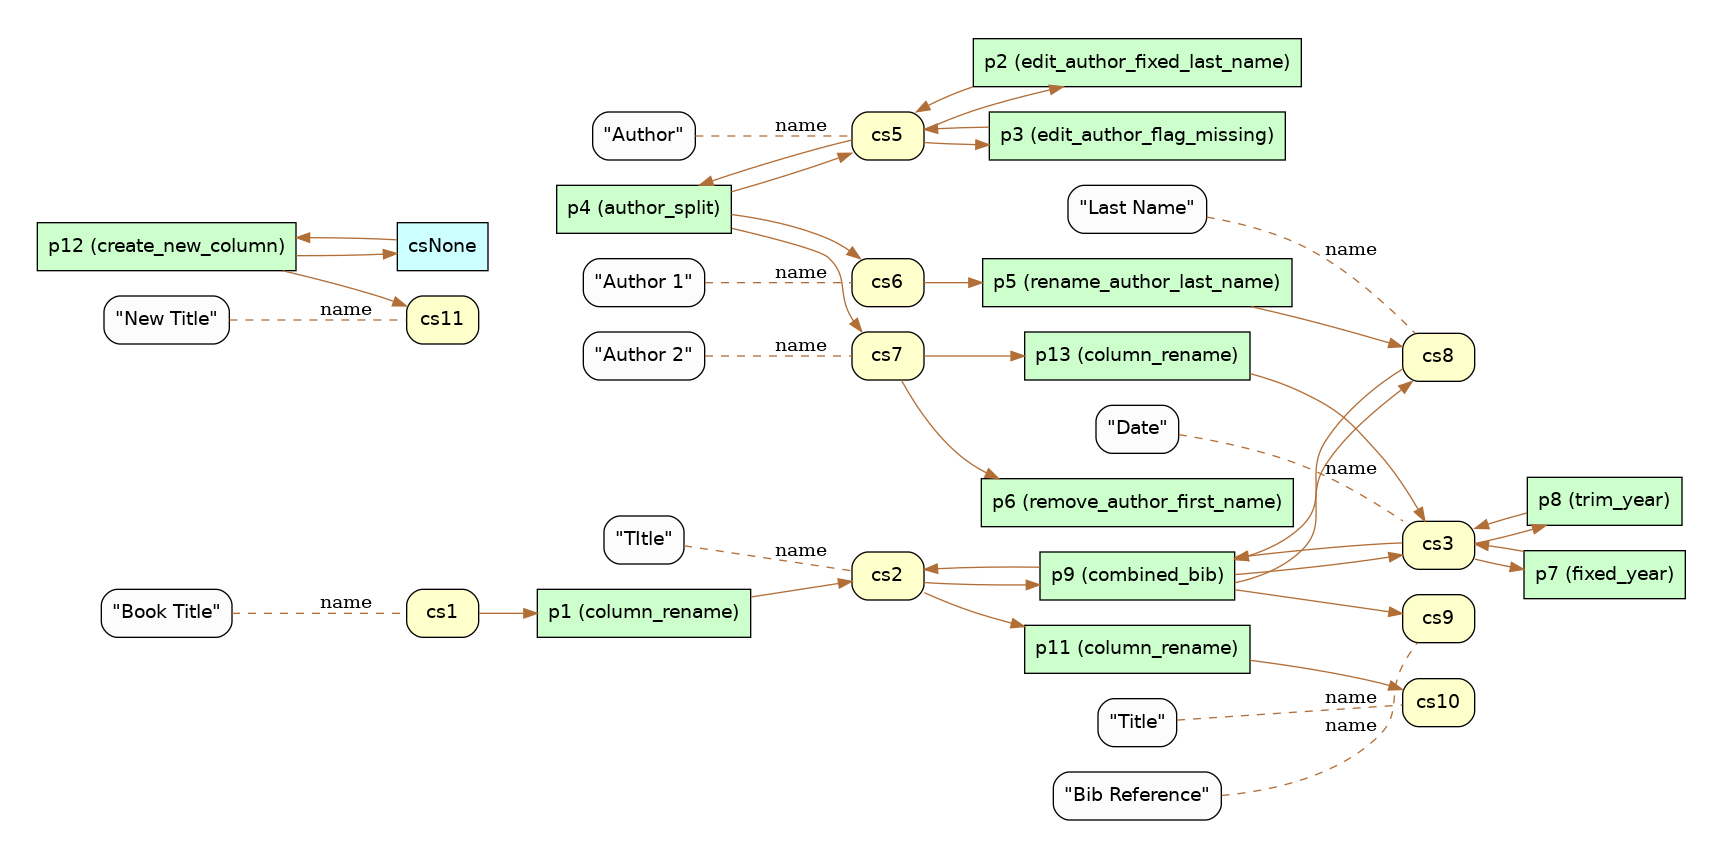

In [11]:
generate_pdf(gv_string,"process_model_abstraction")

In [12]:
# visualize workflow step in the edge

nodes_def = """
digraph "[stackcollapse]" {
node [style=filled fillcolor="#f8f8f8"]
"""

edge_def = ""

# workflow template gv format

header = """
/* Start of top-level graph */
digraph Workflow {
rankdir=LR

/* Start of double cluster for drawing box around nodes in workflow */
subgraph cluster_workflow_box_outer { label=""; penwidth=0
subgraph cluster_workflow_box_inner { label=""; penwidth=0
"""

single_process = """
/* Style for nodes representing atomic programs in workflow */
node[shape=box style=filled fillcolor="#CCFFCC" peripheries=1 fontname=Helvetica]

/* Nodes representing atomic programs in workflow */
"""
#state_4 [shape=record rankdir=LR label="{<f0> step 4 (to_date) | grel\:value.replace(/\\/i,'') | 16492 cells changed}"];


side_b_process = """
node[shape=box style=filled fillcolor="#CCCCFF" peripheries=1 fontname=Helvetica]
"""
#state_5 [shape=record rankdir=LR label="{<f0> state_5 |<f1> core/mass-edit\nclustering\ngroup clustering 4 processes}"];

side_b_data = """
node[shape=box style="rounded,filled" fillcolor="#FFDDDD" peripheries=1 fontname=Helvetica]
"""

side_a_data = """
node[shape=box style="rounded,filled" fillcolor="#CCFFFF" peripheries=1 fontname=Helvetica]
"""


freq_pattern_nodes = """
node[shape=box style=filled fillcolor="#CCFFFF" peripheries=1 fontname=Helvetica]
"""
#state_5 [shape=record rankdir=LR label="{<f0> state_5 |<f1> core/mass-edit\nclustering\ngroup clustering 4 processes}"];

column_nodes = """
/* Style for nodes representing non-parameter data channels in workflow */
node[shape=box style="rounded,filled" fillcolor="#FFFFCC" peripheries=1 fontname=Helvetica]

/* Nodes for non-parameter data channels in workflow */
"""
#"col12_0-date" [shape=record rankdir=LR label="{<f0> date_0 }"]

parameters_nodes = """
/* Style for nodes representing parameter channels in workflow */
node[shape=box style="rounded,filled" fillcolor="#FCFCFC" peripheries=1 fontname=Helvetica]

/* Nodes representing parameter channels in workflow */
"""

edges = """
/* Edges representing connections between programs and channels */
"""
#"col12_0-date" -> state_4


footer = """
/* End of double cluster for drawing box around nodes in workflow */
}}

/* End of top-level graph */
}
"""

# process nodes

for p in df_output_str[("process",2)]:
    single_process+='''
    "{pid}" [shape=record rankdir=LR label="{{<f0> {pid} ({process_name}) }}"];
    '''.format(pid=p[1],process_name=p[2])

# schema nodes
for cs in df_output_str[("column_schema",3)]:    
    column_nodes+="""
    "{node_name}" [shape=record rankdir=LR label="{{<f0> {label} }}"]
    """.format(node_name=cs[1],label=cs[1].replace('"','\\"'))
    '''
    parameters_nodes+="""
    "{node_name}" [shape=record rankdir=LR label="{{<f0> {label} }}"]
    """.format(node_name=cs[1]+"_"+cs[2],label=cs[3].replace('"','\\"'))
    edges+="""
        {output} -> {input} [label="{data}" weight=14 color="#b26e37" tooltip="" labeltooltip="", style=dashed, arrowhead=none]    
    """.format(input=cs[1],output=cs[1]+"_"+cs[2],data=cs[2])  
    '''

# add labels on the edge based on the work
wf_labels = {}
for wf in df_output_str[("recipe",4)]:
    # limit label for example r1 only
    if wf[1] != "r1":
        continue
    try:
        wf_labels[wf[3]]
    except:
        wf_labels[wf[3]] = ""
    if wf_labels[wf[3]]!="":
        wf_labels[wf[3]]+=";"
    wf_labels[wf[3]] += "{}.{}".format(wf[1],wf[2])

    
# edge input output
for inp in df_output_str[("process_input",3)]:       
    try:
        wf_labels[inp[1]]
    except:
        continue
    edges+="""
        {input} -> {output} [label="{data}" weight=14 color="#b26e37" tooltip="" labeltooltip=""]    
    """.format(input=inp[3],output=inp[1],data="in:"+wf_labels[inp[1]])            

for out in df_output_str[("process_output",3)]:        
    try:
        wf_labels[out[1]]
    except:
        continue
    edges+="""
        {input} -> {output} [label="{data}" weight=14 color="#b26e37" tooltip="" labeltooltip=""]    
    """.format(input=out[1],output=out[3],data="out:"+wf_labels[out[1]])            

                        

gv_string = header+single_process+column_nodes+parameters_nodes+side_b_process+side_a_data+side_b_data+freq_pattern_nodes+edges+footer


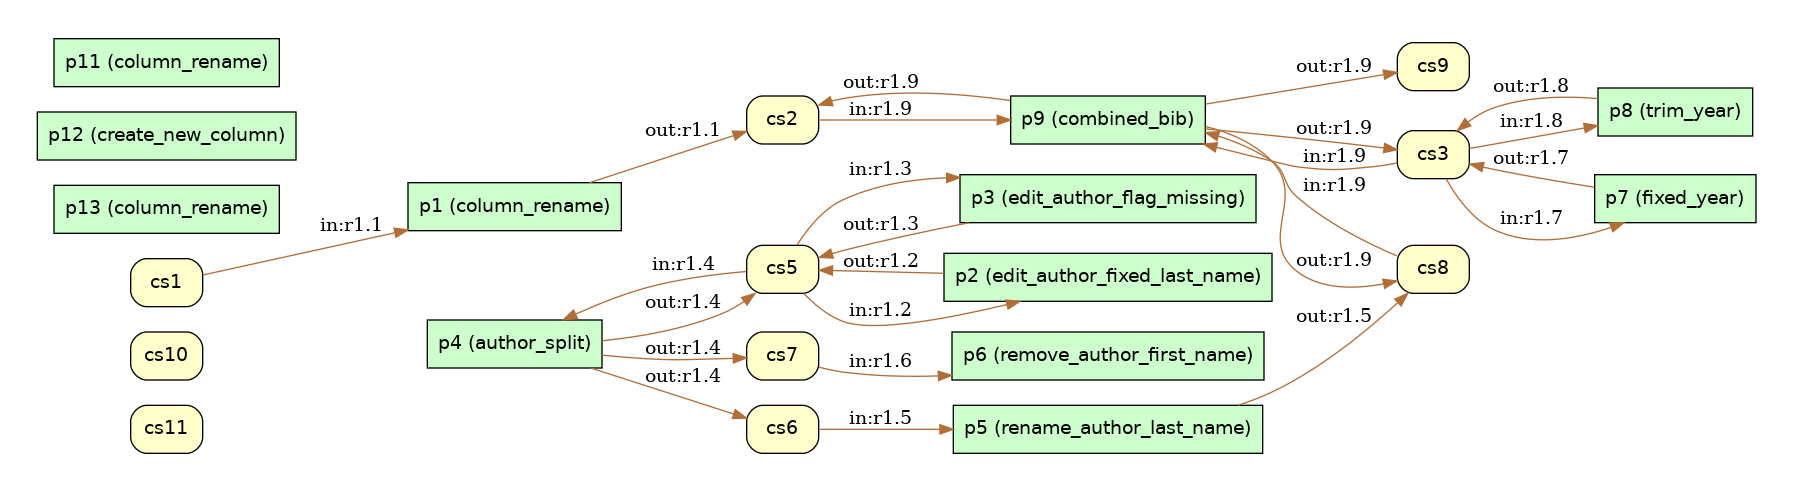

In [13]:
generate_pdf(gv_string,"process_model_abstraction_with_workflow")

# Schema Pre-Post conditions

In [14]:
import pandas as pd
derived_dependency_pd = pd.DataFrame(df_output_str[("derived_output_inv_clean",12)]).sort_values([5,8])
derived_dependency_pd = derived_dependency_pd[derived_dependency_pd[1]=="r1_parallel"]

In [15]:
derived_dependency_pd

,0,1,2,3,4,5,6,7,8,9,10,11,12
83,derived_output_inv_clean,r1_parallel,0,9,"seq(0,1)",0,"seq(seq(0,1),seq(1,9,0),1)",1,cs2,"schema_state(cs1,-1)","schema_state(cs2,1)",p1,1
85,derived_output_inv_clean,r1_parallel,0,9,"seq(0,7)",0,"seq(seq(0,7),seq(seq(7,8),seq(8,9,0),1),2)",2,cs3,"schema_state(cs3,-1)","schema_state(cs3,7)",p7,7
84,derived_output_inv_clean,r1_parallel,0,9,"seq(0,2)",0,"seq(seq(0,2),seq(seq(2,3),seq(seq(3,4),seq(seq...",4,cs5,"schema_state(cs5,-1)","schema_state(cs5,2)",p2,2
105,derived_output_inv_clean,r1_parallel,0,9,"seq(0,1)",0,"seq(seq(0,1),seq(1,9,0),1)",1,csRemoved,"schema_state(cs1,-1)","schema_state(csRemoved,1)",p1,1
4,derived_output_inv_clean,r1_parallel,0,9,"seq(7,8)",1,"seq(seq(0,7),seq(seq(7,8),seq(8,9,0),1),2)",1,cs3,"schema_state(cs3,7)","schema_state(cs3,8)",p8,8
3,derived_output_inv_clean,r1_parallel,0,9,"seq(2,3)",1,"seq(seq(0,2),seq(seq(2,3),seq(seq(3,4),seq(seq...",3,cs5,"schema_state(cs5,2)","schema_state(cs5,3)",p3,3
2,derived_output_inv_clean,r1_parallel,0,9,"seq(1,9)",1,"seq(seq(0,1),seq(1,9,0),1)",0,cs9,"schema_state(cs2,1)","schema_state(cs9,9)",p9,9
27,derived_output_inv_clean,r1_parallel,0,9,"seq(3,4)",2,"seq(seq(0,2),seq(seq(2,3),seq(seq(3,4),seq(seq...",2,cs6,"schema_state(cs5,3)","schema_state(cs6,4)",p4,4
28,derived_output_inv_clean,r1_parallel,0,9,"seq(3,4)",2,"seq(seq(0,2),seq(seq(2,3),seq(seq(3,4),seq(seq...",2,cs7,"schema_state(cs5,3)","schema_state(cs7,4)",p4,4
29,derived_output_inv_clean,r1_parallel,0,9,"seq(8,9)",2,"seq(seq(0,7),seq(seq(7,8),seq(8,9,0),1),2)",0,cs9,"schema_state(cs3,8)","schema_state(cs9,9)",p9,9


In [16]:
#p[5].split(",")[-1],p[12].split(",")[-1]
df_output_str.keys()

dict_keys([('process_in_out', 3), ('process_input', 3), ('process_output', 3), ('all_recipe_input', 2), ('all_recipe_output', 2), ('recipe', 4), ('recipe_edge', 4), ('recipe_path', 4), ('recipe_edge', 6), ('recipe_path', 6), ('serialize_recipe_path', 8), ('select_serialize_recipe', 7), ('select_serialize_derived_input', 8), ('select_serialize_derived_input_temp', 5), ('recipe_start', 3), ('recipe_sink', 3), ('select_recipe_input_violation', 9), ('test_serialize_recipe', 9), ('test_select_serialize_derived_input', 10), ('test_serialize_recipe_dup', 3), ('test_serialize_recipe_unique', 9), ('minimal_input', 8), ('derived_output', 8), ('derived_output', 12), ('derived_output_inv', 12), ('derived_process', 10), ('derived_process_addin', 10), ('derived_process_addin_max', 5), ('derived_process_clean', 10), ('derived_process_not', 6), ('derived_process_max', 5), ('derived_process_max', 4), ('max_derived_output_n', 2), ('derived_process_schema', 6), ('derived_process_schema_removed', 4), ('de

In [17]:
#process_set[p[12]],column_set[p[11].split(",")[0].split("(")[-1]].replace('"','\\"')

In [18]:
# visualize using graphviz yw layout

nodes_def = """
digraph "[stackcollapse]" {
node [style=filled fillcolor="#f8f8f8"]
"""

edge_def = ""

# workflow template gv format

header = """
/* Start of top-level graph */
digraph Workflow {
rankdir=TB

/* Start of double cluster for drawing box around nodes in workflow */
subgraph cluster_workflow_box_outer { label=""; penwidth=0
subgraph cluster_workflow_box_inner { label=""; penwidth=0
"""

single_process = """
/* Style for nodes representing atomic programs in workflow */
node[shape=box style=filled fillcolor="#CCFFCC" peripheries=1 fontname=Helvetica]

/* Nodes representing atomic programs in workflow */
"""
#state_4 [shape=record rankdir=LR label="{<f0> step 4 (to_date) | grel\:value.replace(/\\/i,'') | 16492 cells changed}"];


side_b_process = """
node[shape=box style=filled fillcolor="#CCCCFF" peripheries=1 fontname=Helvetica]
"""
#state_5 [shape=record rankdir=LR label="{<f0> state_5 |<f1> core/mass-edit\nclustering\ngroup clustering 4 processes}"];

side_b_data = """
node[shape=box style="rounded,filled" fillcolor="#FFDDDD" peripheries=1 fontname=Helvetica]
"""

side_a_data = """
node[shape=box style="rounded,filled" fillcolor="#CCFFFF" peripheries=1 fontname=Helvetica]
"""


freq_pattern_nodes = """
node[shape=box style=filled fillcolor="#CCFFFF" peripheries=1 fontname=Helvetica]
"""
#state_5 [shape=record rankdir=LR label="{<f0> state_5 |<f1> core/mass-edit\nclustering\ngroup clustering 4 processes}"];

column_nodes = """
/* Style for nodes representing non-parameter data channels in workflow */
node[shape=box style="rounded,filled" fillcolor="#FFFFCC" peripheries=1 fontname=Helvetica]

/* Nodes for non-parameter data channels in workflow */
"""
#"col12_0-date" [shape=record rankdir=LR label="{<f0> date_0 }"]

parameters_nodes = """
/* Style for nodes representing parameter channels in workflow */
node[shape=box style="rounded,filled" fillcolor="#FCFCFC" peripheries=1 fontname=Helvetica]

/* Nodes representing parameter channels in workflow */
"""

edges = """
/* Edges representing connections between programs and channels */
"""
#"col12_0-date" -> state_4


footer = """
/* End of double cluster for drawing box around nodes in workflow */
}}

/* End of top-level graph */
}
"""

edges_defined = set()
column_set = {x[1]:x[3] for x in df_output_str[("column_schema",3)]}
column_set["csRemoved"] = "removed"
column_set["csNone"] = ""
process_set = {x[1]:x[2] for x in df_output_str[("process",2)]}

for p in derived_dependency_pd.to_records():
    #print(p)
    # workflow step/process nodes
    single_process+='''
    "{sid}.{pid}" [shape=record rankdir=LR label="{{<f0> {process_name} ({pid}) }}"];
    '''.format(sid=p[13],pid=p[12],process_name=process_set[p[12]].replace('"','\\"'))


    '''
    parameters_nodes+="""
    "{node_name}" [shape=record rankdir=LR label="{{<f0> {label} }}"]
    """.format(node_name=cs[1]+"_"+cs[2],label=cs[3].replace('"','\\"'))
    edges+="""
        {output} -> {input} [label="{data}" weight=14 color="#b26e37" tooltip="" labeltooltip="", style=dashed, arrowhead=none]    
    """.format(input=cs[1],output=cs[1]+"_"+cs[2],data=cs[2])  
    '''
        
    #if p[5].split(",")[-1]==p[11].split(",")[-1]:    
    input_edge = '"{input}" -> "{sid}.{pid}"'.format(input=p[10],sid=p[13],pid=p[12])  
    output_edge = '"{sid}.{pid}" -> "{output}"'.format(output=p[11],sid=p[13],pid=p[12])        


    if input_edge not in edges_defined:
        # schema nodes
        column_nodes+="""
        "{input}" [shape=record rankdir=LR label="{{<f0> {label} ({pid}) }}"]
        """.format(input=p[10],
                   label=column_set[p[10].split(",")[0].split("(")[-1]].replace('"','\\"'),
                   pid=p[10].split(",")[0].split("(")[-1]
                  )   

        edges_defined.add(input_edge)

        edges+="""
            "{input}" -> "{sid}.{pid}" [label="" weight=14 color="#b26e37" tooltip="" labeltooltip=""]    
        """.format(input=p[10],sid=p[13],pid=p[12])         

    if p[9] != "csRemoved":
        # no output edge needed

        if output_edge not in edges_defined:
            # schema nodes
            column_nodes+="""
            "{output}" [shape=record rankdir=LR label="{{<f0> {label} ({pid}) }}"]
            """.format(output=p[11],
                       label=column_set[p[11].split(",")[0].split("(")[-1]].replace('"','\\"'),
                      pid=p[11].split(",")[0].split("(")[-1]
                      )

            edges_defined.add(output_edge)

            edges+="""
                "{sid}.{pid}" -> "{output}"  [label="" weight=14 color="#b26e37" tooltip="" labeltooltip=""]    
            """.format(output=p[11],sid=p[13],pid=p[12])        
                        

gv_string = header+single_process+column_nodes+parameters_nodes+side_b_process+side_a_data+side_b_data+freq_pattern_nodes+edges+footer


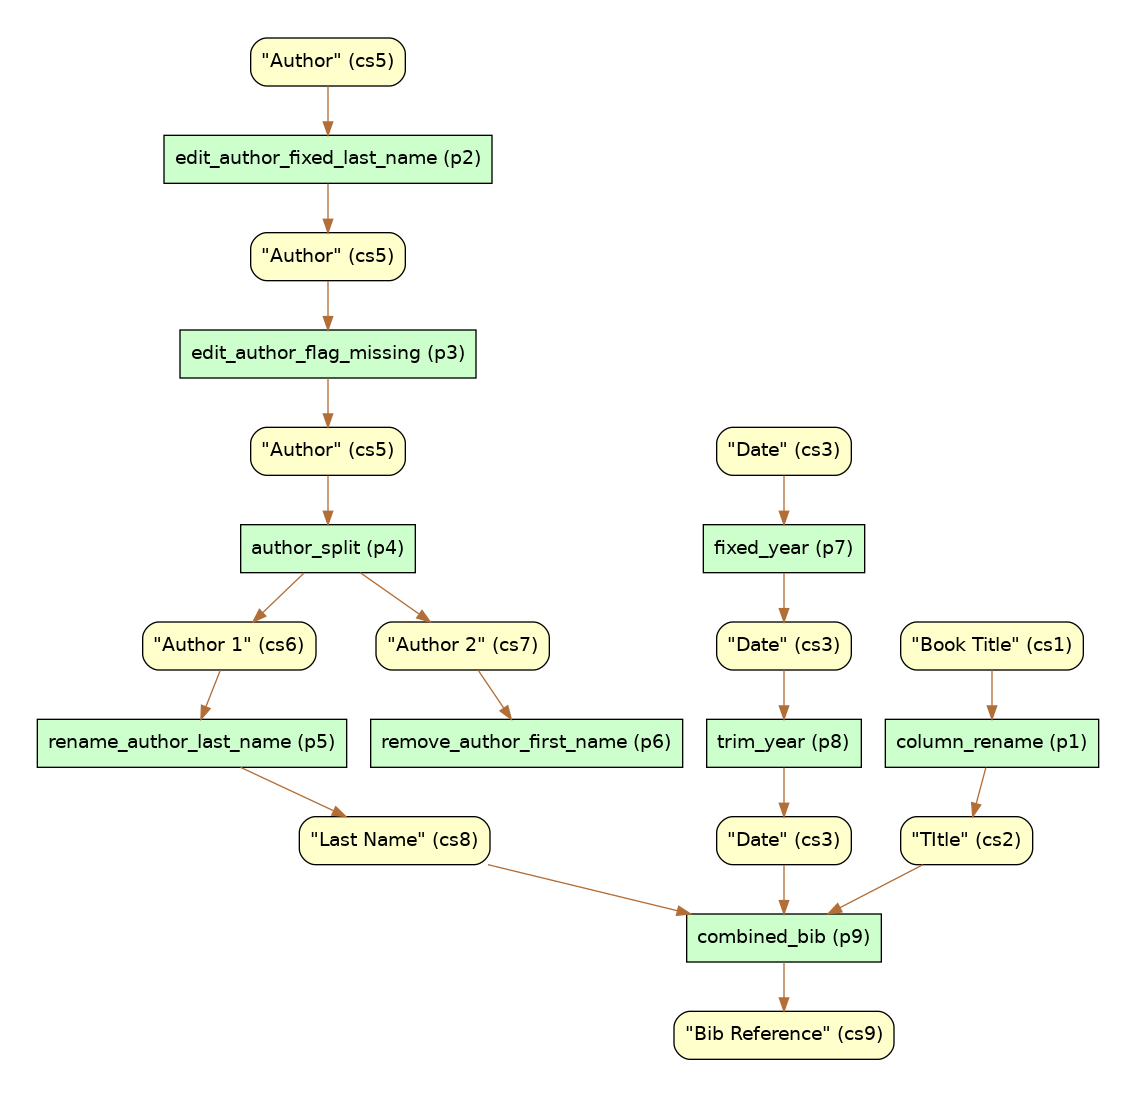

In [19]:
generate_pdf(gv_string,"parallel_recipe_viz")